In [1]:
%pip install pandas scikit-learn pyarrow

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Carregar o DataFrame
try:
	df = pd.read_parquet('TMDB_movie_dataset_v11(com correçao).parquet')
	print("DataFrame carregado com sucesso.")
except Exception as e:
	print(f"Erro ao carregar o DataFrame: {e}")

# Verificar as primeiras linhas do DataFrame
print(df.head())

# Preparar os dados
# Supondo que 'features' são as colunas que você usará para treinar o modelo
# e 'lucratividade' é a coluna alvo
try:
	features = df.drop(columns=['lucratividade'])
	target = df['lucratividade']
	print("Dados preparados com sucesso.")
except KeyError as e:
	print(f"Erro ao preparar os dados: {e}")

# Dividir os dados em conjuntos de treinamento e teste
try:
	X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
	print("Divisão dos dados realizada com sucesso.")
except Exception as e:
	print(f"Erro ao dividir os dados: {e}")

# Treinar o modelo de Random Forest
try:
	clf = RandomForestClassifier(n_estimators=100, random_state=42)
	clf.fit(X_train, y_train)
	print("Modelo treinado com sucesso.")
except Exception as e:
	print(f"Erro ao treinar o modelo: {e}")

# Fazer previsões
try:
	y_pred = clf.predict(X_test)
	print("Previsões realizadas com sucesso.")
except Exception as e:
	print(f"Erro ao fazer previsões: {e}")

# Avaliar o modelo
try:
	print(classification_report(y_test, y_pred))
	print("Avaliação do modelo realizada com sucesso.")
except Exception as e:
	print(f"Erro ao avaliar o modelo: {e}")

# Atualizar a coluna 'lucratividade' no DataFrame original
try:
	df['lucratividade'] = clf.predict(features)
	print("Coluna 'lucratividade' atualizada com sucesso.")
except Exception as e:
	print(f"Erro ao atualizar a coluna 'lucratividade': {e}")

# Salvar o DataFrame atualizado
try:
	df.to_parquet('TMDB_movie_dataset_v11_atualizado.parquet')
	print("DataFrame atualizado salvo com sucesso.")
except Exception as e:
	print(f"Erro ao salvar o DataFrame atualizado: {e}")

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.1 MB 1.0 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/11.1 MB 1.1 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/11.1 MB 1.1 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/11.1 MB 1.0 MB/s eta 0:00:10
   ----- ---------------------------------- 1.6/11.1 MB 964.5 kB/s eta 0:00:10
   ----- ---------------------------------- 1.6/11.1 MB 964.5 kB/s eta 0:00:10
   ------ --------------------------------- 1.8/11.1 MB 959.1 kB/s eta 0:00:10
   ------- -------------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


DataFrame carregado com sucesso.
       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

                                            overview popula

In [2]:
%pip install pandas scikit-learn pyarrow

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Carregar o DataFrame
try:
    df = pd.read_parquet('TMDB_movie_dataset_v11(com correçao).parquet')
    print("DataFrame carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o DataFrame: {e}")
    exit()

# Verificar as primeiras linhas do DataFrame
print(df.head())

# Verificar se 'lucratividade' existe no DataFrame
if 'lucratividade' not in df.columns:
    print("Erro: Coluna 'lucratividade' não encontrada no DataFrame.")
    exit()

# Separar os recursos (features) e o alvo (target)
features = df.drop(columns=['lucratividade'])
target = df['lucratividade']

# Verificar e converter colunas categóricas
for col in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Treinar o modelo de Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Fazer previsões
y_pred = clf.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))

# Fazer previsões apenas nos dados de teste
df.loc[X_test.index, 'lucratividade_predita'] = y_pred

# Salvar o DataFrame atualizado
df.to_parquet('TMDB_movie_dataset_v11_atualizado.parquet')
print("DataFrame atualizado salvo com sucesso.")



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
DataFrame carregado com sucesso.
       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  .

<Figure size 1000x600 with 0 Axes>

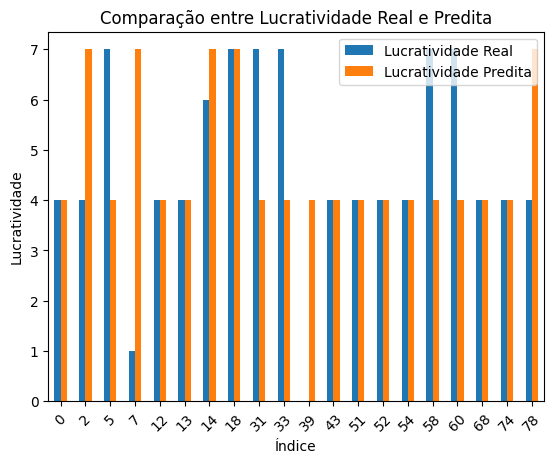

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Comparar as colunas 'lucratividade' e 'lucratividade_predita'
comparison_df = df[['lucratividade', 'lucratividade_predita']].dropna()

# Converter colunas para valores numéricos
le = LabelEncoder()
comparison_df['lucratividade'] = le.fit_transform(comparison_df['lucratividade'])
comparison_df['lucratividade_predita'] = le.transform(comparison_df['lucratividade_predita'])

# Plotar a comparação
plt.figure(figsize=(10, 6))
comparison_df.head(20).plot(kind='bar')
plt.title('Comparação entre Lucratividade Real e Predita')
plt.xlabel('Índice')
plt.ylabel('Lucratividade')
plt.xticks(rotation=45)
plt.legend(['Lucratividade Real', 'Lucratividade Predita'])
plt.show()

<Figure size 1000x600 with 0 Axes>

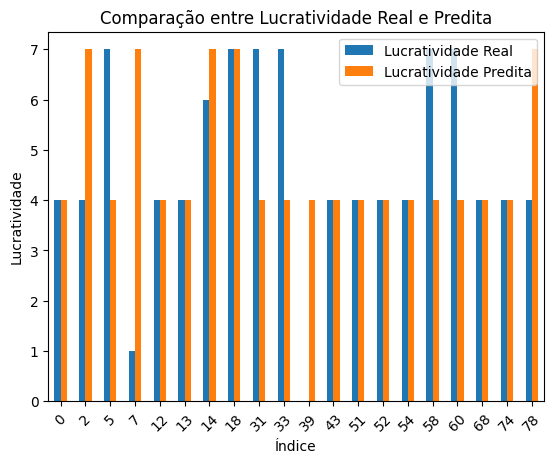

<Figure size 1000x600 with 0 Axes>

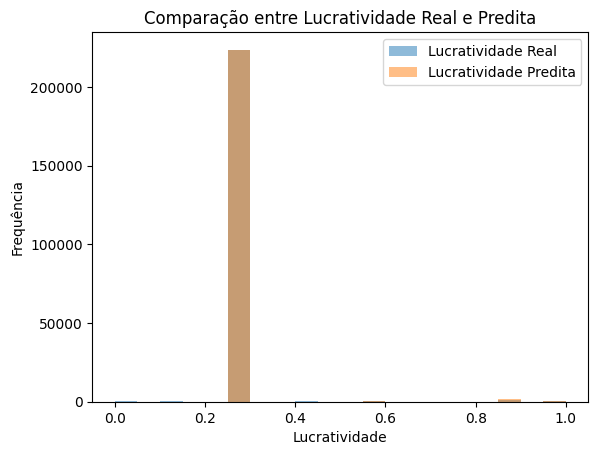

In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Comparar as colunas 'lucratividade' e 'lucratividade_predita'
comparison_df = df[['lucratividade', 'lucratividade_predita']].dropna()

# Converter colunas para valores numéricos
le = LabelEncoder()
comparison_df['lucratividade'] = le.fit_transform(comparison_df['lucratividade'])
comparison_df['lucratividade_predita'] = le.transform(comparison_df['lucratividade_predita'])

# Plotar a comparação
plt.figure(figsize=(10, 6))
comparison_df.head(20).plot(kind='bar')
plt.title('Comparação entre Lucratividade Real e Predita')
plt.xlabel('Índice')
plt.ylabel('Lucratividade')
plt.xticks(rotation=45)
plt.legend(['Lucratividade Real', 'Lucratividade Predita'])
# Converter colunas para valores numéricos usando MinMaxScaler
scaler = MinMaxScaler()
comparison_df[['lucratividade', 'lucratividade_predita']] = scaler.fit_transform(comparison_df[['lucratividade', 'lucratividade_predita']])

# Plotar a comparação usando histograma
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='hist', alpha=0.5, bins=20)
plt.title('Comparação entre Lucratividade Real e Predita')
plt.xlabel('Lucratividade')
plt.ylabel('Frequência')
plt.legend(['Lucratividade Real', 'Lucratividade Predita'])
plt.show()

<Figure size 1000x600 with 0 Axes>

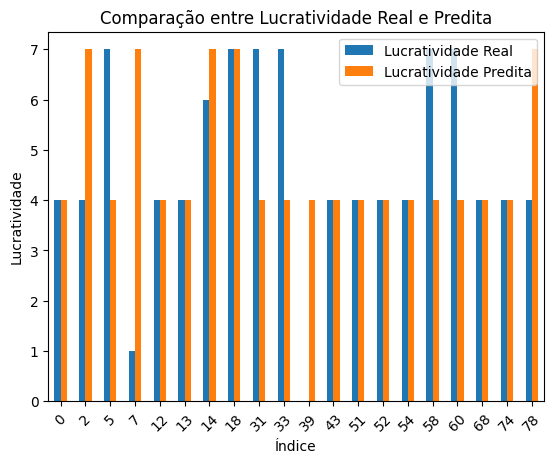

<Figure size 1000x600 with 0 Axes>

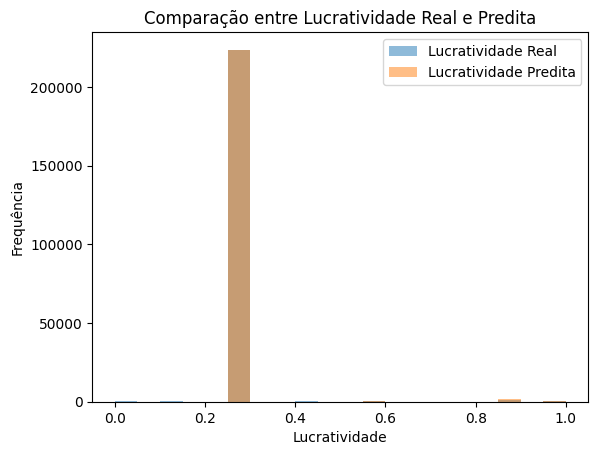

<Figure size 1000x600 with 0 Axes>

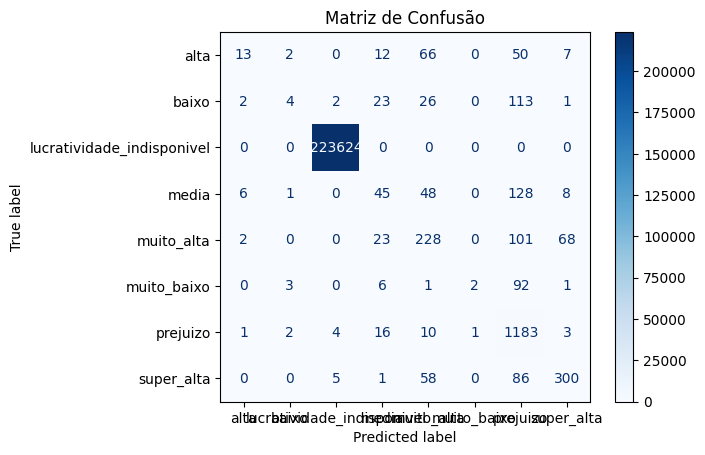

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Comparar as colunas 'lucratividade' e 'lucratividade_predita'
comparison_df = df[['lucratividade', 'lucratividade_predita']].dropna()

# Converter colunas para valores numéricos
le = LabelEncoder()
comparison_df['lucratividade'] = le.fit_transform(comparison_df['lucratividade'])
comparison_df['lucratividade_predita'] = le.transform(comparison_df['lucratividade_predita'])

# Plotar a comparação
plt.figure(figsize=(10, 6))
comparison_df.head(20).plot(kind='bar')
plt.title('Comparação entre Lucratividade Real e Predita')
plt.xlabel('Índice')
plt.ylabel('Lucratividade')
plt.xticks(rotation=45)
plt.legend(['Lucratividade Real', 'Lucratividade Predita'])

# Converter colunas para valores numéricos usando MinMaxScaler
scaler = MinMaxScaler()
comparison_df[['lucratividade', 'lucratividade_predita']] = scaler.fit_transform(comparison_df[['lucratividade', 'lucratividade_predita']])

# Plotar a comparação usando histograma
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='hist', alpha=0.5, bins=20)
plt.title('Comparação entre Lucratividade Real e Predita')
plt.xlabel('Lucratividade')
plt.ylabel('Frequência')
plt.legend(['Lucratividade Real', 'Lucratividade Predita'])
plt.show()

# Gerar a matriz de confusão
y_test_encoded = le.transform(y_test)
y_pred_encoded = le.transform(y_pred)
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

In [9]:
from sklearn.model_selection import RandomizedSearchCV

# Definir os hiperparâmetros a serem testados
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_dist, 
                                   n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Realizar a busca pelos melhores hiperparâmetros
random_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(random_search.best_params_)

# Treinar o modelo com os melhores hiperparâmetros
best_clf = random_search.best_estimator_
best_clf.fit(X_train, y_train)

# Fazer previsões
y_pred = best_clf.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))

# Fazer previsões apenas nos dados de teste
df.loc[X_test.index, 'lucratividade_predita'] = y_pred

# Salvar o DataFrame atualizado
df.to_parquet('TMDB_movie_dataset_v11_atualizado.parquet')
print("DataFrame atualizado salvo com sucesso.")


Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Tiago Filho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
111 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
58 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Tiago Filho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Tiago Filho\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Tiago Filho\AppData\Local\Programs\Python\Python312\Lib\sit

Melhores hiperparâmetros encontrados:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
                            precision    recall  f1-score   support

                      alta       0.50      0.07      0.13       150
                     baixo       0.44      0.05      0.08       171
lucratividade_indisponivel       1.00      1.00      1.00    223624
                     media       0.35      0.22      0.27       236
                muito_alta       0.55      0.53      0.54       422
               muito_baixo       0.33      0.01      0.02       105
                  prejuizo       0.69      0.98      0.81      1220
                super_alta       0.75      0.70      0.73       450

                  accuracy                           1.00    226378
                 macro avg       0.58      0.44      0.45    226378
              weighted avg       1.00      1.00      1.00    226378

DataFrame a

In [24]:
# Treinar o modelo com os melhores hiperparâmetros
best_clf = random_search.best_estimator_
best_clf.fit(X_train, y_train)

# Fazer previsões
y_pred = best_clf.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))

# Fazer previsões apenas nos dados de teste
df.loc[X_test.index, 'lucratividade_predita'] = y_pred

# Salvar o DataFrame atualizado
df.to_parquet('TMDB_movie_dataset_v11_atualizado.parquet')
print("DataFrame atualizado salvo com sucesso.")

                            precision    recall  f1-score   support

                      alta       0.50      0.07      0.13       150
                     baixo       0.44      0.05      0.08       171
lucratividade_indisponivel       1.00      1.00      1.00    223624
                     media       0.35      0.22      0.27       236
                muito_alta       0.55      0.53      0.54       422
               muito_baixo       0.33      0.01      0.02       105
                  prejuizo       0.69      0.98      0.81      1220
                super_alta       0.75      0.70      0.73       450

                  accuracy                           1.00    226378
                 macro avg       0.58      0.44      0.45    226378
              weighted avg       1.00      1.00      1.00    226378

DataFrame atualizado salvo com sucesso.


DataFrame atualizado carregado com sucesso.


<Figure size 1000x600 with 0 Axes>

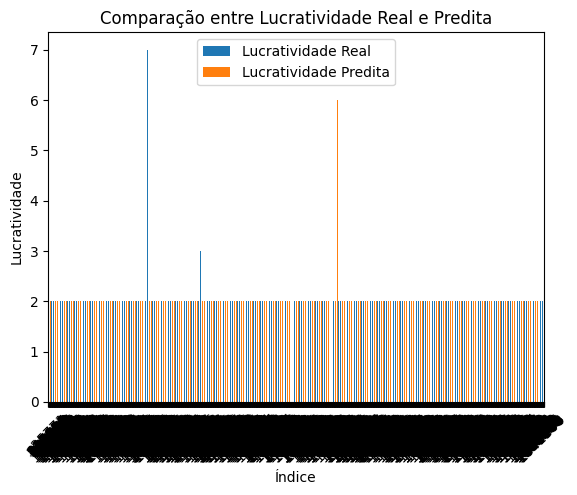

<Figure size 1000x600 with 0 Axes>

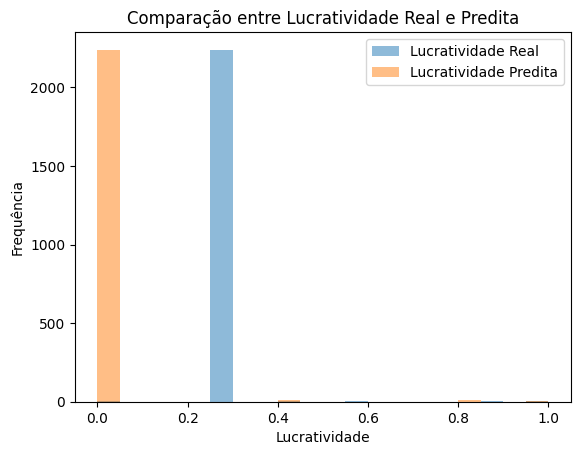

<Figure size 1000x600 with 0 Axes>

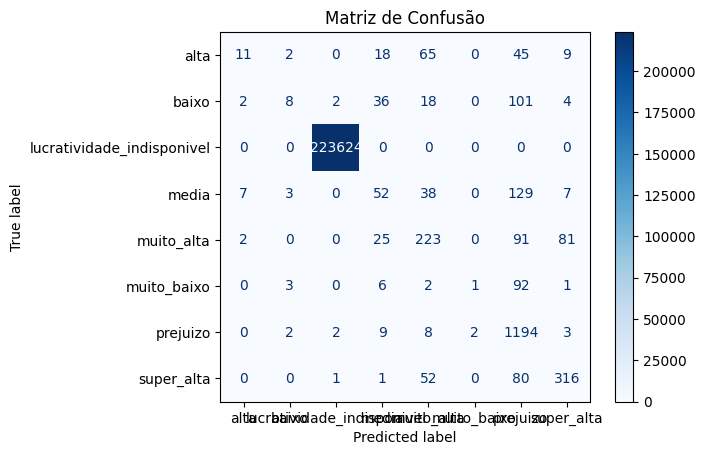

In [26]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Carregar o DataFrame atualizado
try:
    df = pd.read_parquet('TMDB_movie_dataset_v11_atualizado.parquet')
    print("DataFrame atualizado carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o DataFrame atualizado: {e}")

# Comparar as colunas 'lucratividade' e 'lucratividade_predita'
comparison_df = df[['lucratividade', 'lucratividade_predita']].dropna()

# Converter colunas para valores numéricos
le = LabelEncoder()
comparison_df['lucratividade'] = le.fit_transform(comparison_df['lucratividade'])
comparison_df['lucratividade_predita'] = le.transform(comparison_df['lucratividade_predita'])

# Obter uma amostra representativa do DataFrame
sample_df = comparison_df.sample(frac=0.01, random_state=42)  # 1% de amostra

# Plotar a comparação
plt.figure(figsize=(10, 6))
sample_df.plot(kind='bar')
plt.title('Comparação entre Lucratividade Real e Predita')
plt.xlabel('Índice')
plt.ylabel('Lucratividade')
plt.xticks(rotation=45)
plt.legend(['Lucratividade Real', 'Lucratividade Predita'])

# Converter colunas para valores numéricos usando MinMaxScaler
scaler = MinMaxScaler()
sample_df[['lucratividade', 'lucratividade_predita']] = scaler.fit_transform(sample_df[['lucratividade', 'lucratividade_predita']])

# Plotar a comparação usando histograma
plt.figure(figsize=(10, 6))
sample_df.plot(kind='hist', alpha=0.5, bins=20)
plt.title('Comparação entre Lucratividade Real e Predita')
plt.xlabel('Lucratividade')
plt.ylabel('Frequência')
plt.legend(['Lucratividade Real', 'Lucratividade Predita'])
plt.show()

# Gerar a matriz de confusão
y_test_encoded = le.transform(y_test)
y_pred_encoded = le.transform(y_pred)
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Collecting seaborn
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

DataFrame atualizado carregado com sucesso.


<Figure size 1000x600 with 0 Axes>

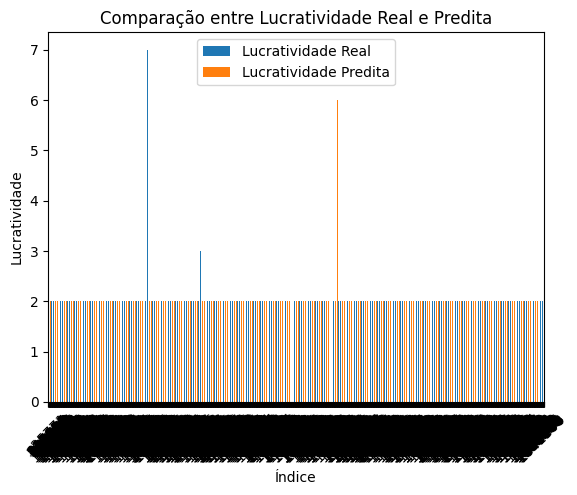

<Figure size 1000x600 with 0 Axes>

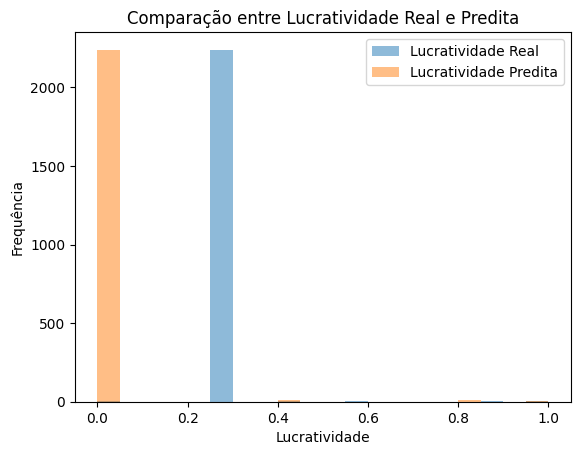

<Figure size 1000x600 with 0 Axes>

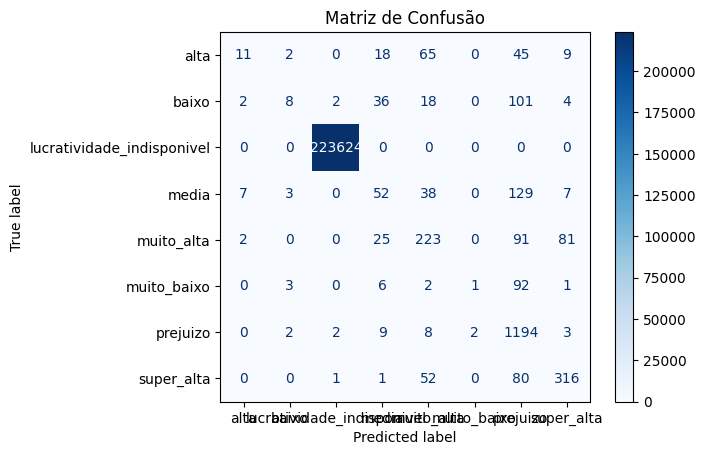

<Figure size 1000x600 with 0 Axes>

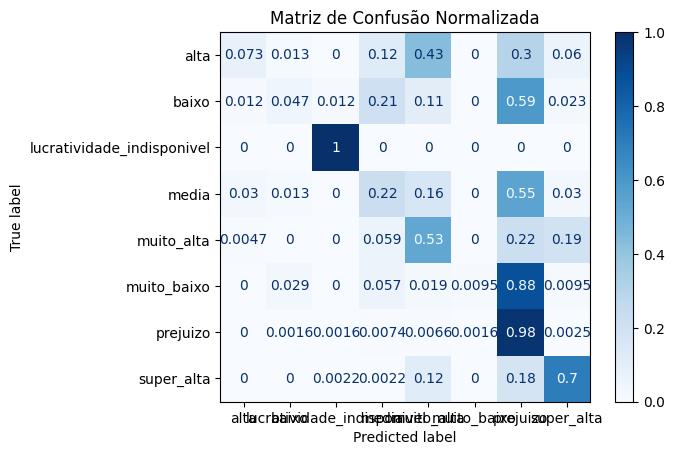

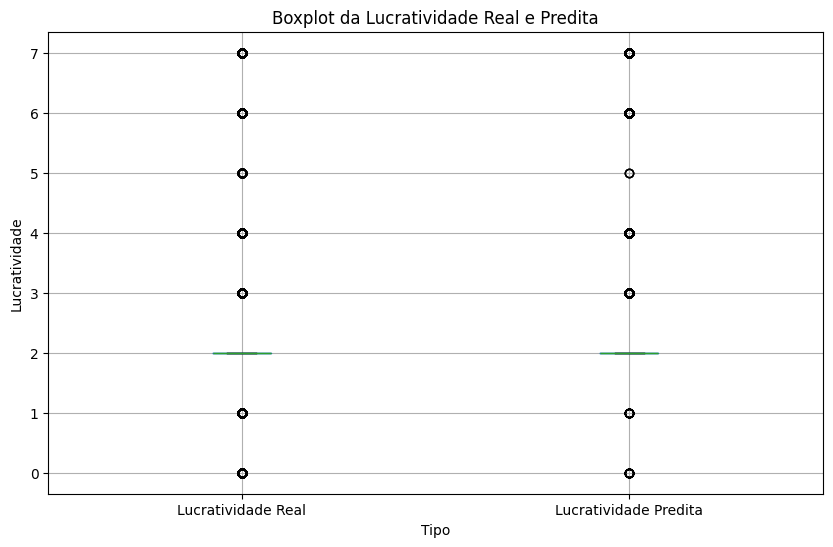

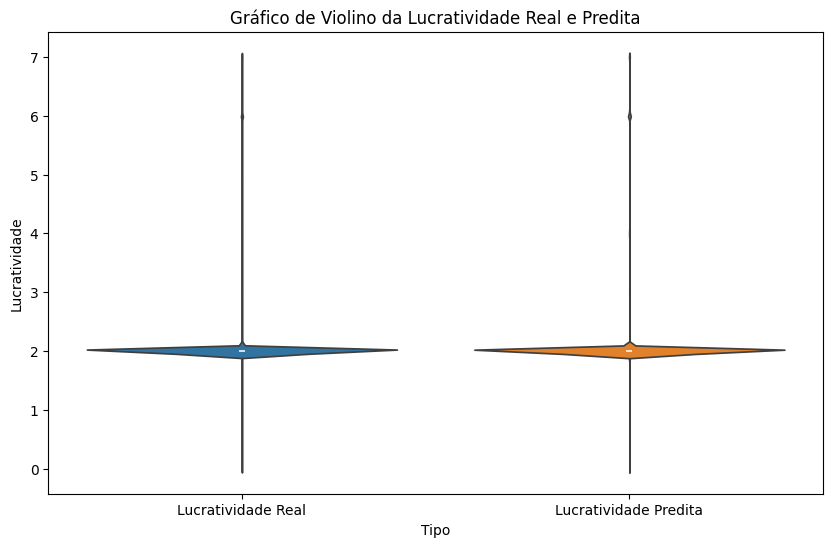

In [29]:
%pip install seaborn

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns

# Carregar o DataFrame atualizado
try:
    df = pd.read_parquet('TMDB_movie_dataset_v11_atualizado.parquet')
    print("DataFrame atualizado carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o DataFrame atualizado: {e}")

# Comparar as colunas 'lucratividade' e 'lucratividade_predita'
comparison_df = df[['lucratividade', 'lucratividade_predita']].dropna()

# Converter colunas para valores numéricos
le = LabelEncoder()
comparison_df['lucratividade'] = le.fit_transform(comparison_df['lucratividade'])
comparison_df['lucratividade_predita'] = le.transform(comparison_df['lucratividade_predita'])

# Obter uma amostra representativa do DataFrame
sample_df = comparison_df.sample(frac=0.01, random_state=42)  # 1% de amostra

# Plotar a comparação
plt.figure(figsize=(10, 6))
sample_df.plot(kind='bar')
plt.title('Comparação entre Lucratividade Real e Predita')
plt.xlabel('Índice')
plt.ylabel('Lucratividade')
plt.xticks(rotation=45)
plt.legend(['Lucratividade Real', 'Lucratividade Predita'])

# Converter colunas para valores numéricos usando MinMaxScaler
scaler = MinMaxScaler()
sample_df[['lucratividade', 'lucratividade_predita']] = scaler.fit_transform(sample_df[['lucratividade', 'lucratividade_predita']])

# Plotar a comparação usando histograma
plt.figure(figsize=(10, 6))
sample_df.plot(kind='hist', alpha=0.5, bins=20)
plt.title('Comparação entre Lucratividade Real e Predita')
plt.xlabel('Lucratividade')
plt.ylabel('Frequência')
plt.legend(['Lucratividade Real', 'Lucratividade Predita'])
plt.show()

# Gerar a matriz de confusão
y_test_encoded = le.transform(y_test)
y_pred_encoded = le.transform(y_pred)
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()
# Gerar a matriz de confusão normalizada
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp_normalized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le.classes_)

# Plotar a matriz de confusão normalizada
plt.figure(figsize=(10, 6))
disp_normalized.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão Normalizada')
plt.show()

# Plotar o boxplot
plt.figure(figsize=(10, 6))
comparison_df.boxplot()
plt.title('Boxplot da Lucratividade Real e Predita')
plt.xlabel('Tipo')
plt.ylabel('Lucratividade')
plt.xticks([1, 2], ['Lucratividade Real', 'Lucratividade Predita'])
plt.show()

# Plotar o gráfico de violino
plt.figure(figsize=(10, 6))
sns.violinplot(data=comparison_df)
plt.title('Gráfico de Violino da Lucratividade Real e Predita')
plt.xlabel('Tipo')
plt.ylabel('Lucratividade')
plt.xticks([0, 1], ['Lucratividade Real', 'Lucratividade Predita'])
plt.show()